In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
f=lambda x:np.exp(-x**2/2)-x
x=np.linspace(0,1,100)
fx=f(x)
y0=[0]*len(x)

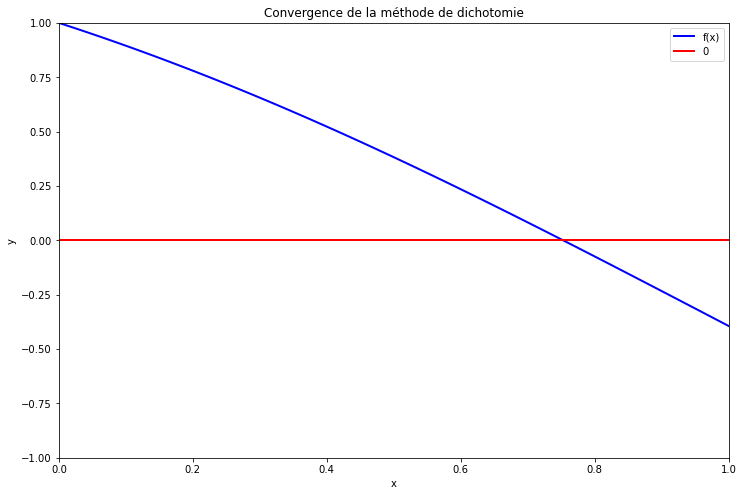

In [3]:
# create a figure and axes
fig = plt.figure(figsize=(12,8))
ax1 = plt.subplot(1,1,1)   
# set up the subplots as needed
ax1.set_xlim(( 0, 1))            
ax1.set_ylim((-1, 1))
ax1.set_xlabel('x')
ax1.set_ylabel('y')
#fixed
line1, = ax1.plot(x, fx, 'b', lw=2)
line2, = ax1.plot(x, [0]*len(x), 'r', lw=2)
pt1, = ax1.plot([],[], 'go', ms=10)
# create objects that will change in the animation. These are
# initially empty, and will be given new values for each frame
# in the animation.
txt_title = ax1.set_title('Convergence de la méthode de dichotomie')
ax1.legend(['f(x)','0']);

In [4]:
#Le model
def dichotomie(f,a,b):
    x=a
    y=b
    while True:
        mid=(x+y)/2
        yield mid
        if(f(mid)==0):
            break
        if f(x)*f(mid)<=0:
            y=mid
        else:
            x=mid

In [5]:
#Computing
(a,b)=(0,1)
dico=dichotomie(f,a,b)
alpha=0
xn_dicho=[]
try :
    
    for i in range(100):
        alpha=next(dico)
        #print(str(i)+"  "+str(alpha))
        xn_dicho.append(alpha)
except:
    pass
y0=[0]*len(xn_dicho)

In [6]:
# animation function. This is called sequentially
def drawframe_dicho(n):
    pt1.set_data(xn_dicho[:n],y0[:n])
    txt_title = ax1.set_title('Méthode de dichotomie frame {}'.format(n))
    return (line1,line2)

In [7]:
from matplotlib import animation

# blit=True re-draws only the parts that have changed.
anim = animation.FuncAnimation(fig, drawframe_dicho, frames=100, interval=1000, blit=True)

In [8]:
from IPython.display import HTML
HTML(anim.to_html5_video())

In [9]:
len(xn_dicho)
print(xn_dicho[-1])

0.7530891649796748
